<a href="https://colab.research.google.com/github/VictorFrancheto/Complex_Network/blob/main/lista_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalando a biblioteca `graph-tool`(https://graph-tool.skewed.de)



In [1]:
!mkdir -p /etc/apt/keyrings; mkdir -p ~/.gnupg; chmod 700 ~/.gnupg
!gpg --no-default-keyring --keyring /etc/apt/keyrings/skewed.de.gpg --keyserver keyserver.ubuntu.com --recv-keys 612DEFB798507F25
!echo "deb [signed-by=/etc/apt/keyrings/skewed.de.gpg] https://downloads.skewed.de/apt $(lsb_release -s -c) main" > /etc/apt/sources.list.d/skewed.list
!apt-get update
!apt-get install python3-graph-tool python3-matplotlib python3-cairo

gpg: key 612DEFB798507F25: "Tiago de Paula Peixoto <tiago@skewed.de>" not changed
gpg: Total number processed: 1
gpg:              unchanged: 1
Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Ign:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:6 https://r2u.stat.illinois.edu/ubuntu jammy Release
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://downloads.skewed.de/apt jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:14 http://

In [2]:
# O Colab usa uma instalação Python diferente da do sistema! Colaboração ruim! Precisamos de algumas soluções alternativas.
!apt purge python3-cairo
!apt install libcairo2-dev pkg-config python3-dev
!pip install --force-reinstall pycairo
!pip install zstandard

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following packages were automatically installed and are no longer required:
  libbz2-dev libpkgconf3 libreadline-dev
Use 'apt autoremove' to remove them.
The following packages will be REMOVED:
  python3-cairo*
0 upgraded, 0 newly installed, 1 to remove and 47 not upgraded.
After this operation, 310 kB disk space will be freed.
(Reading database ... 132759 files and directories currently installed.)
Removing python3-cairo:amd64 (1.20.1-3build1) ...
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libcairo2-dev is already the newest version (1.16.0-5ubuntu2).
pkg-config is already the newest version (0.29.2-1ubuntu3).
python3-dev is already the newest version (3.10.6-1~22.04.1).
The following packages were automatically installed and are no longer required:
  libbz2-dev libpkgconf3 libreadline-dev
Use 'apt autoremove' to remove them.
0 upgr

### Agora podemos usar a ferramenta gráfica como qualquer outro módulo Python

In [3]:
import graph_tool.all as gt

# Redes Complexas
---

Redes selecionadas:

https://networks.skewed.de/net/fresh_webs#fn:icon

**Descrição:**
Um conjunto de 26 redes de interações entre espécies em diferentes níveis tróficos em riachos na Nova Zelândia, Maine e Carolina do Norte. As redes incluem a identificação de espécies de insetos aquáticos, algas e peixes, além de suas interações tróficas. Matrizes de adjacência em Excel e texto simples estão disponíveis; as redes podem ser baixadas individualmente ou em grupo.

**Citação:** R.M. Thompson and C.R. Townsend, "Impacts on stream food webs of native and exotic forest: an intercontinental comparison." Ecology 84, 145-161 (2003)., https://doi.org/10.1890/0012-9658(2003)084[0145:iosfwo]2.0.co;2 [@sci-hub]

----

https://networks.skewed.de/net/bitcoin_alpha

**Descrição:** Uma rede de relacionamentos de quem-confia-em-quém entre os usuários da plataforma **Bitcoin Alpha**. Cada aresta direcionada $(i, j, w)$ representa a avaliação do usuário $j$ pelo usuário $i$, na qual $i$ atribui a $j$ um peso $w$ em uma escala de $-10$ (total desconfiança) a $+10$ (total confiança) em passos de $1,1$.

**Citação:**
S. Kumar, F. Spezzano, V.S. Subrahmanian, and C. Faloutsos, "Edge weight prediction in weighted signed networks." IEEE 16th International Conference on Data Mining (ICDM), 221-230 (2016), https://doi.org/10.1109/icdm.2016.0033 [@sci-hub]

---
https://networks.skewed.de/net/7th_graders


**Descrição:** Uma pequena rede complexa de amizades entre $29$ alunos do sétimo ano em Victoria, Austrália. Os alunos indicaram colegas para três atividades diferentes (com quem você se dá bem na classe, quem são seus melhores amigos e com quem você preferiria trabalhar). A direção da aresta para cada um desses três tipos de arestas indica se o nó $i$ nomeou o nó $j$, e o peso da aresta indica a frequência dessa nomeação. Os alunos de 1 a 12 são meninos e os de 13 a 29 são meninas.

**Citação:** M. Vickers and S. Chan, "Representing Classroom Social Structure." Melbourne: Victoria Institute of Secondary Education, (1981)

----

https://networks.skewed.de/net/urban_streets

**Descrição:** Redes urbanas de ruas, correspondentes a mapas de 1 milha quadrada de 20 cidades ao redor do mundo.

**Citação:** P. Crucitti, V. Latora, and S. Porta. "Centrality measures in spatial networks of urban streets". Phys. Rev. E 73 (2006), 036125, https://doi.org/10.1103/PhysRevE.73.036125 [@sci-hub].

V. Latora, V. Nicosia, G. Russo, "Complex Networks: Principles, Methods and Applications", Cambridge University Press (2017), https://doi.org/10.1017/9781316216002 [@sci-hub]


### Importando bibliotecas

In [24]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import spearmanr

#### Lendo as redes selecionadas

In [61]:
def process_graph(graph_name, directed=True):
    """
    Processa um grafo da coleção Graph-tool, convertendo-o para um grafo NetworkX,
    removendo auto-laços e imprimindo o número de nós e arestas.

    Parâmetros:
    graph_name (str): Nome do grafo na coleção Graph-tool.
    directed (bool): Se True, cria um grafo direcionado; se False, cria um grafo não direcionado.
    """
    # Carregar o grafo do graph-tool
    G_gt = gt.collection.ns[graph_name]

    # Criar um grafo vazio do NetworkX, direcionado ou não
    G_nx = nx.DiGraph() if directed else nx.Graph()

    # Adicionar arestas do grafo do Graph-tool para o grafo do NetworkX
    for edge in G_gt.edges():
        G_nx.add_edge(edge.source(), edge.target())

    # Remover auto-laços
    G_nx.remove_edges_from(nx.selfloop_edges(G_nx))

    # Imprimir o número de nós e arestas
    print(f"Grafo: {graph_name}")
    print("Número de nós:", G_nx.number_of_nodes())
    print("Número de arestas:", G_nx.number_of_edges())

    return G_nx  # Retorna o grafo processado

# Processar os grafos direcionados
G_fresh = process_graph("fresh_webs/AkatoreA", directed=True)
G_bit = process_graph("bitcoin_alpha", directed=True)
G_graders = process_graph("7th_graders", directed=True)

# Processar um grafo não direcionado
G_urban = process_graph("urban_streets/cairo", directed=False)

Grafo: fresh_webs/AkatoreA
Número de nós: 84
Número de arestas: 227
Grafo: bitcoin_alpha
Número de nós: 3783
Número de arestas: 24186
Grafo: 7th_graders
Número de nós: 29
Número de arestas: 376
Grafo: urban_streets/cairo
Número de nós: 1496
Número de arestas: 2252


#### Plotando as redes

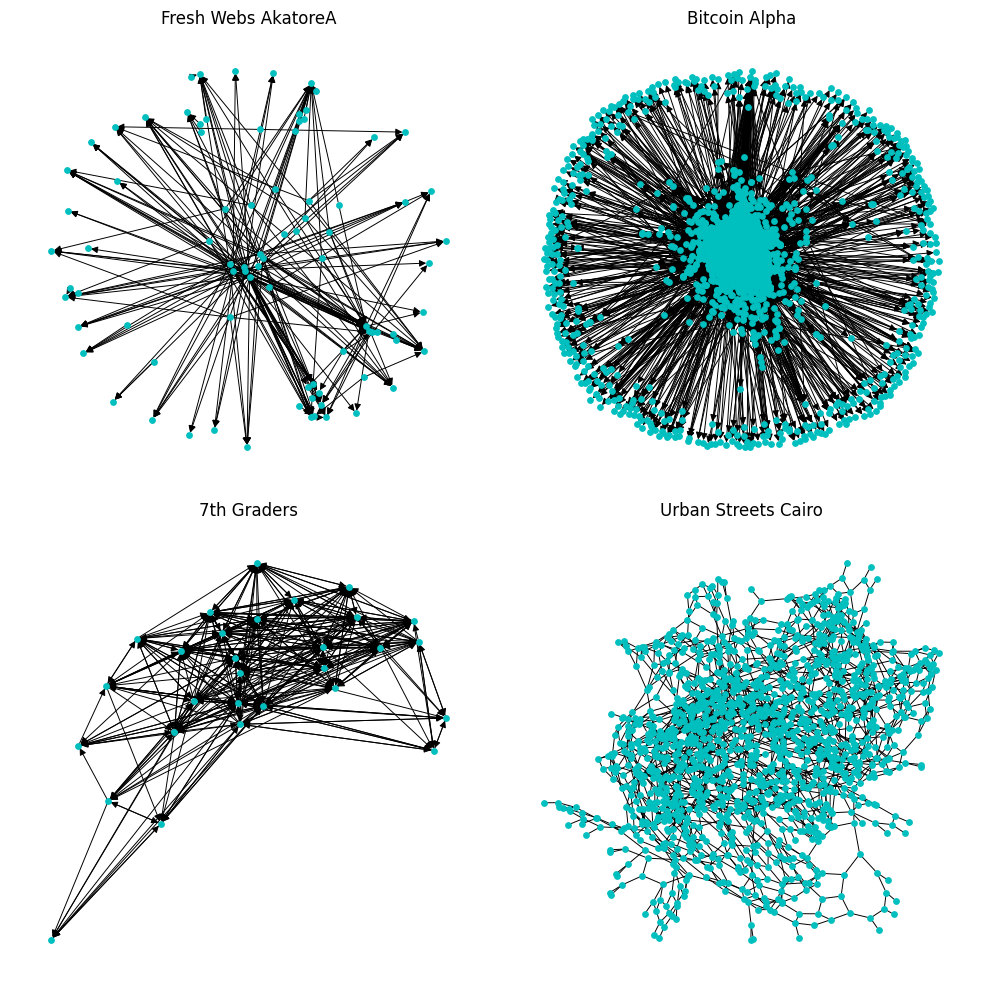

In [6]:
def plot_graph(G_nx, ax, title):
    """
    Função para plotar um grafo em um eixo específico.

    Parâmetros:
    G_nx (networkx.Graph): O grafo a ser plotado.
    ax (matplotlib.Axes): O eixo onde o grafo será plotado.
    title (str): O título do grafo.
    """
    pos = nx.spring_layout(G_nx)  # Definir a disposição do grafo
    nx.draw(
        G_nx, pos,
        ax=ax,
        with_labels=False,  # Sem rótulos
        node_color='c',  # Nós na cor azul claro
        edge_color='black',  # Arestas na cor preta
        node_size=15,
        width=0.7,
        font_size=5,
        font_weight='bold',
        arrows=True  # Exibir setas
    )
    ax.set_title(title)  # Título do subplot

# Criar uma figura com subplots 2x2
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Plotar os grafos nos subplots
plot_graph(G_fresh, axes[0, 0], "Fresh Webs AkatoreA")
plot_graph(G_bit, axes[0, 1], "Bitcoin Alpha")
plot_graph(G_graders, axes[1, 0], "7th Graders")
plot_graph(G_urban, axes[1, 1], "Urban Streets Cairo")

# Ajustar espaçamento entre os subplots
plt.tight_layout()
plt.show()


**Exercício 1.** Calcular e plotar $P(k)$, i.e. a distribuição de probabilidade do grau. $P(k)$ representa a probabilidade de que um vértice possua grau igual a $k$. Mostre este gráfico em escala log-log.
Para as redes direcionadas, mostrar $P(k_{in})$ e $P(k_{out})$ (distribuição dos graus de entrada e saída). Repita todos os procedimentos para a distribuição acumulada.

#### Distribuição e distribuição acumulada do grau para redes direcionadas

In [7]:
def degree_distribution_directed(G):
    # Graus de entrada e saída
    vk_in = dict(G.in_degree())
    vk_out = dict(G.out_degree())

    # Pegando apenas os valores dos graus de entrada e saída
    vk_in = np.array(list(vk_in.values()))
    vk_out = np.array(list(vk_out.values()))

    # Determinando o grau máximo para ambas as distribuições
    maxk_in = np.max(vk_in)
    maxk_out = np.max(vk_out)

    # Criando os vetores de k possíveis para ambas as distribuições
    kvalues_in = np.arange(0, maxk_in + 1)
    kvalues_out = np.arange(0, maxk_out + 1)

    # Inicializando P(k) para entrada e saída
    Pk_in = np.zeros(maxk_in + 1)
    Pk_out = np.zeros(maxk_out + 1)

    # Calculando P(k) para o grau de entrada
    for k in vk_in:
        Pk_in[k] += 1
    Pk_in = Pk_in / sum(Pk_in)

    # Calculando P(k) para o grau de saída
    for k in vk_out:
        Pk_out[k] += 1
    Pk_out = Pk_out / sum(Pk_out)

    # Calculando as distribuições acumuladas
    Pk_in_cum = np.cumsum(Pk_in[::-1])[::-1]  # Reverte, acumula, e depois reverte novamente
    Pk_out_cum = np.cumsum(Pk_out[::-1])[::-1]

    return kvalues_in, Pk_in, Pk_in_cum, kvalues_out, Pk_out, Pk_out_cum
def plot_distribution(kvalues_in, Pk_in, Pk_in_cum, kvalues_out, Pk_out, Pk_out_cum):
    # Plotando a distribuição de grau de entrada e saída
    fig, axs = plt.subplots(2, 2, figsize=(8, 6))

    # P(k_in)
    axs[0, 0].plot(kvalues_in, Pk_in, 'co', markersize=3)
    axs[0, 0].set_xscale('log')
    axs[0, 0].set_yscale('log')
    axs[0, 0].set_title('Distribuição $P(k_{in})$', fontsize=10)  # Tamanho da legenda
    axs[0, 0].set_xlabel('$k_{in}$', fontsize=8)
    axs[0, 0].set_ylabel('$P(k_{in})$', fontsize=8)
    axs[0, 0].grid(False)  # Remove as linhas de fundo

    # P(k_out)
    axs[0, 1].plot(kvalues_out, Pk_out, 'o', markersize=3, color='orange')
    axs[0, 1].set_xscale('log')
    axs[0, 1].set_yscale('log')
    axs[0, 1].set_title('Distribuição $P(k_{out})$', fontsize=10)  # Tamanho da legenda
    axs[0, 1].set_xlabel('$k_{out}$', fontsize=8)
    axs[0, 1].set_ylabel('$P(k_{out})$', fontsize=8)
    axs[0, 1].grid(False)

    # Distribuição acumulada P(k_in)
    axs[1, 0].plot(kvalues_in, Pk_in_cum, 'co', markersize=3)
    axs[1, 0].set_xscale('log')
    axs[1, 0].set_yscale('log')
    axs[1, 0].set_title('Distribuição Acumulada $P(k_{in})$', fontsize=10)
    axs[1, 0].set_xlabel('$k_{in}$', fontsize=8)
    axs[1, 0].set_ylabel('$P(k_{in})$ acumulada', fontsize=8)
    axs[1, 0].grid(False)

    # Distribuição acumulada P(k_out)
    axs[1, 1].plot(kvalues_out, Pk_out_cum, 'o', markersize=3, color='orange')
    axs[1, 1].set_xscale('log')
    axs[1, 1].set_yscale('log')
    axs[1, 1].set_title('Distribuição Acumulada $P(k_{out})$', fontsize=10)
    axs[1, 1].set_xlabel('$k_{out}$', fontsize=8)
    axs[1, 1].set_ylabel('$P(k_{out})$ acumulada', fontsize=8)
    axs[1, 1].grid(False)

    plt.tight_layout()
    plt.show()

#### Plotando as distribuições das redes

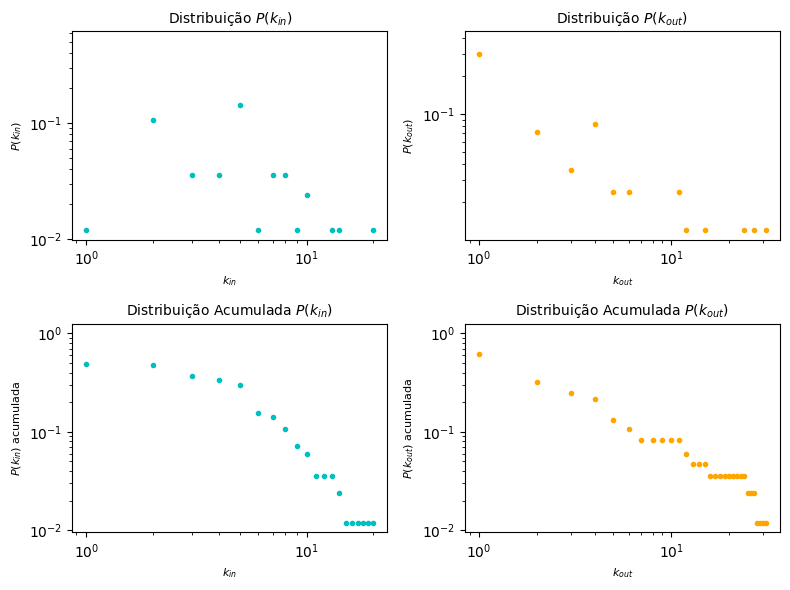

In [8]:
k_in, Pk_in, Pk_in_cum, k_out, Pk_out, Pk_out_cum = degree_distribution_directed(G_fresh)
plot_distribution(k_in, Pk_in, Pk_in_cum, k_out, Pk_out, Pk_out_cum)

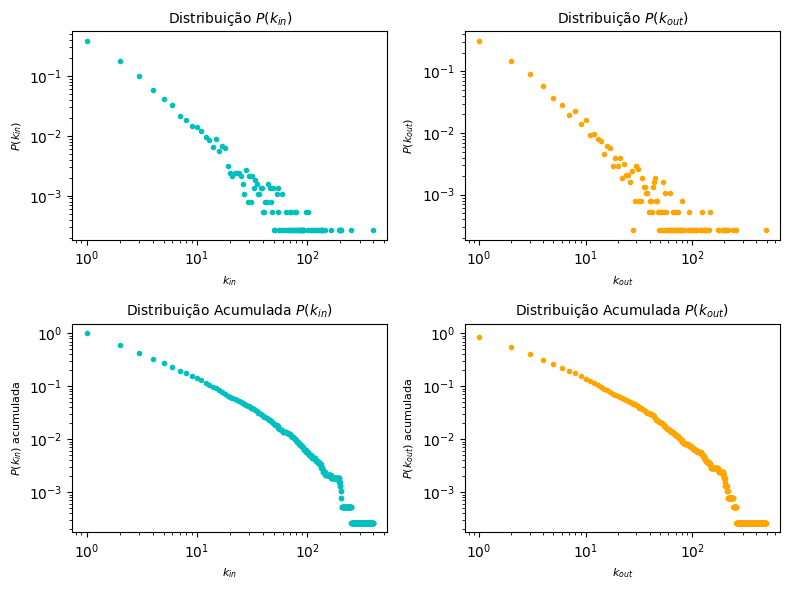

In [9]:
k_in, Pk_in, Pk_in_cum, k_out, Pk_out, Pk_out_cum = degree_distribution_directed(G_bit)
plot_distribution(k_in, Pk_in, Pk_in_cum, k_out, Pk_out, Pk_out_cum)

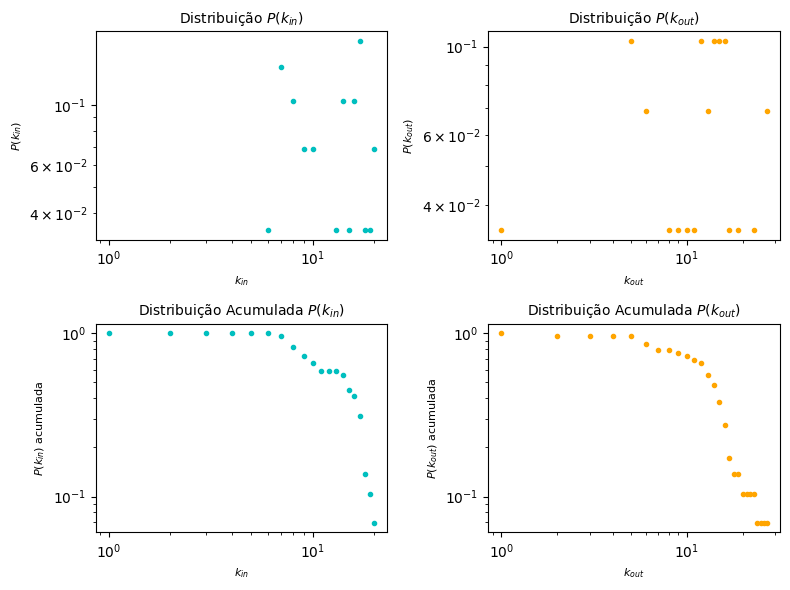

In [10]:
k_in, Pk_in, Pk_in_cum, k_out, Pk_out, Pk_out_cum = degree_distribution_directed(G_graders)
plot_distribution(k_in, Pk_in, Pk_in_cum, k_out, Pk_out, Pk_out_cum)

#### Distribuição e distribuição acumulada do grau para redes não direcionadas

In [11]:
def degree_distribution_undirected(G):
    # Graus totais (para grafos não direcionados)
    vk = dict(G.degree())

    # Pegando apenas os valores dos graus
    vk = np.array(list(vk.values()))

    # Determinando o grau máximo
    maxk = np.max(vk)

    # Criando os vetores de k possíveis
    kvalues = np.arange(0, maxk + 1)

    # Inicializando P(k)
    Pk = np.zeros(maxk + 1)

    # Calculando P(k)
    for k in vk:
        Pk[k] += 1
    Pk = Pk / sum(Pk)  # Normalizando para que a soma seja 1

    # Calculando a distribuição acumulada
    Pk_cum = np.cumsum(Pk[::-1])[::-1]  # Reverte, acumula e reverte de novo

    return kvalues, Pk, Pk_cum

def plot_distribution_undirected(kvalues, Pk, Pk_cum):
    # Plotando a distribuição de grau e sua acumulada
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))  # Tamanho quadrado 5x5

    # P(k)
    axs[0].plot(kvalues, Pk, 'co', markersize=4)  # Tom de verde
    axs[0].set_xscale('log')
    axs[0].set_yscale('log')
    axs[0].set_title('Distribuição $P(k)$', fontsize=10)
    axs[0].set_xlabel('$k$', fontsize=8)
    axs[0].set_ylabel('$P(k)$', fontsize=8)
    axs[0].grid(False)  # Remove as linhas de fundo

    # Distribuição acumulada P(k)
    axs[1].plot(kvalues, Pk_cum, 'o', markersize=4, color='orange')  # Tom de verde
    axs[1].set_xscale('log')
    axs[1].set_yscale('log')
    axs[1].set_title('Distribuição Acumulada $P(k)$', fontsize=10)
    axs[1].set_xlabel('$k$', fontsize=8)
    axs[1].set_ylabel('$P(k)$ acumulada', fontsize=8)
    axs[1].grid(False)  # Remove as linhas de fundo

    plt.tight_layout()
    plt.show()

Grafo: urban_streets/cairo
Número de nós: 1496
Número de arestas: 2252


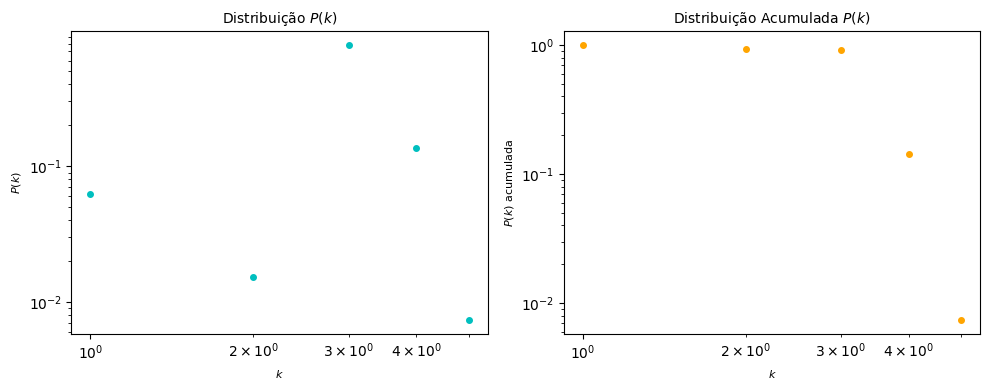

In [12]:
# Exemplo de uso com o grafo não direcionado
G_urban = process_graph("urban_streets/cairo", directed=False)
k, Pk, Pk_cum = degree_distribution_undirected(G_urban)
plot_distribution_undirected(k, Pk, Pk_cum)

**Exercício 2.** Calcular a centralidade de autovetores para todas as redes. Qual a correlação (Pearson) entre a centralidade de autovetores e o grau? Mostre o valor da correlação e os respectivos scatter-plots (eixo-x = grau do vértice, eixo y = centralidade de auto-vetor do vértice).

Correlação de Pearson para G_fresh: 0.0111
Correlação de Pearson para G_bit: 0.8952
Correlação de Pearson para G_graders: 0.6457
Correlação de Pearson para G_urban: 0.1568


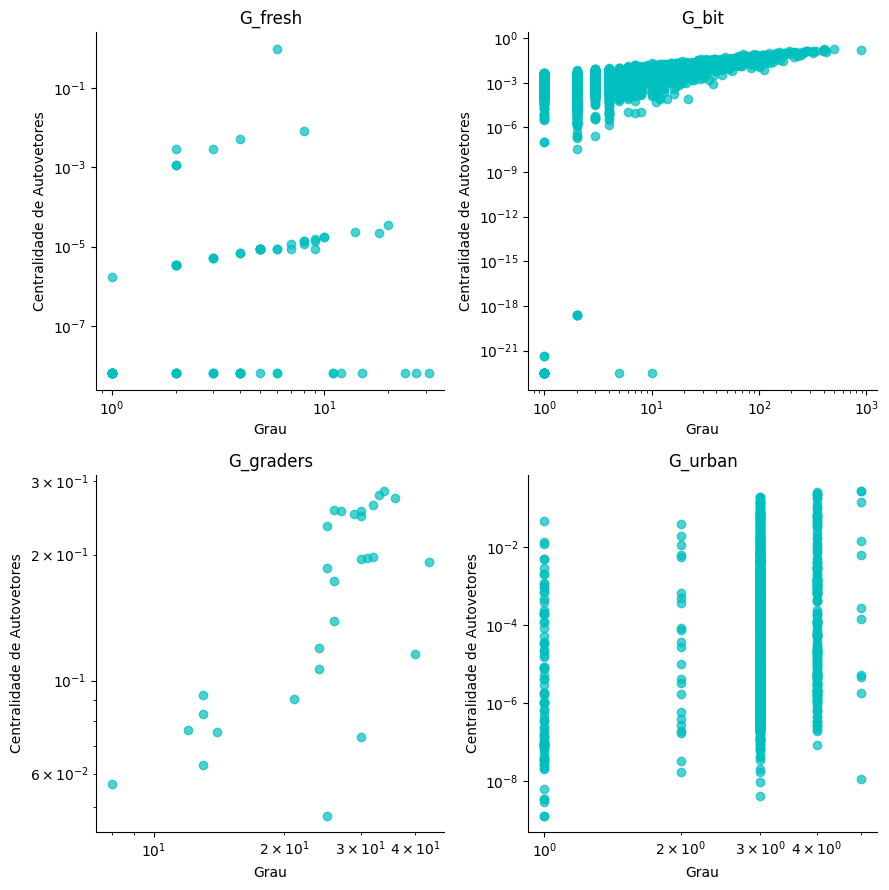

In [13]:
# Armazenar os grafos em um dicionário
graphs = {
    "G_fresh": G_fresh,
    "G_bit": G_bit,
    "G_graders": G_graders,
    "G_urban": G_urban
}

def calculate_eigenvector_centrality(G, max_iter=1000):
    """
    Calcula a centralidade de autovetores para o grafo G, com opções de iterações e tolerância.

    Parâmetros:
    G (NetworkX graph): O grafo para o qual calcular a centralidade.
    max_iter (int): Número máximo de iterações.

    Retorna:
    dict: Dicionário com nós e suas respectivas centralidades.
    """
    return nx.eigenvector_centrality(G, max_iter=max_iter)

def plot_scatter(degrees, eigenvector_centrality, ax, title):
    ax.scatter(degrees, eigenvector_centrality, color='c', alpha=0.7)  # Cor verde água
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_title(title)
    ax.set_xlabel('Grau')
    ax.set_ylabel('Centralidade de Autovetores')
    ax.grid(False)  # Remove as linhas de fundo
    ax.spines['top'].set_visible(False)  # Remove a borda superior
    ax.spines['right'].set_visible(False)  # Remove a borda direita

def plot_all_graphs(graphs):
    fig, axs = plt.subplots(2, 2, figsize=(9, 9))
    axs = axs.flatten()  # Facilita o acesso aos eixos

    for idx, (name, G) in enumerate(graphs.items()):
        try:
            # Calcular o grau e a centralidade de autovetores
            degrees = np.array([G.degree(n) for n in G.nodes()])
            eigenvector_centrality = np.array(list(calculate_eigenvector_centrality(G).values()))

            # Calcular a correlação de Pearson
            correlation, _ = stats.pearsonr(degrees, eigenvector_centrality)
            print(f'Correlação de Pearson para {name}: {correlation:.4f}')

            # Plotar o scatter plot
            plot_scatter(degrees, eigenvector_centrality, axs[idx], name)
        except nx.PowerIterationFailedConvergence as e:
            print(f'Falha na convergência para {name}: {e}')

    plt.tight_layout()
    plt.show()

# Exemplo de uso
plot_all_graphs(graphs)


**Exercício 3.** Para as redes direcionadas, verifique se existem vértices com centralidade nula mesmo quando há conexões de entrada.

In [37]:
def verifica_centralidade_nula_com_entrada(G_nx):
    """
    Verifica se há vértices em um grafo direcionado que possuem centralidade nula,
    mesmo com conexões de entrada.

    Parâmetros:
    G_nx (networkx.DiGraph): O grafo direcionado a ser processado.

    Retorna:
    True se existem vértices com centralidade nula, False caso contrário.
    """
    # Calcular a centralidade de autovetor com o mesmo valor de tolerância
    try:
        centralidade = nx.eigenvector_centrality(G_nx, max_iter=1000, tol=1e-06)
    except nx.PowerIterationFailedConvergence:
        print("Falha na convergência da centralidade de autovetor.")
        return False

    # Verificar se existe pelo menos um vértice com centralidade nula
    nodos_nulos = [nodo for nodo, valor in centralidade.items() if valor < 1e-06]

    if nodos_nulos:
        return True  # Existem vértices com centralidade nula
    else:
        return False  # Nenhum vértice com centralidade nula

In [38]:
# Processar e verificar vértices com centralidade nula nos grafos direcionados
G_fresh = process_graph("fresh_webs/AkatoreA", directed=True)
print("Existem vértices com centralidade nula em G_fresh:", verifica_centralidade_nula_com_entrada(G_fresh))

G_bit = process_graph("bitcoin_alpha", directed=True)
print("Existem vértices com centralidade nula em G_bit:", verifica_centralidade_nula_com_entrada(G_bit))

G_graders = process_graph("7th_graders", directed=True)
print("Existem vértices com centralidade nula em G_graders:", verifica_centralidade_nula_com_entrada(G_graders))


Grafo: fresh_webs/AkatoreA
Número de nós: 84
Número de arestas: 227
Existem vértices com centralidade nula em G_fresh: True
Grafo: bitcoin_alpha
Número de nós: 3783
Número de arestas: 24186
Existem vértices com centralidade nula em G_bit: True
Grafo: 7th_graders
Número de nós: 29
Número de arestas: 376
Existem vértices com centralidade nula em G_graders: False


In [58]:
def desenhar_grafo_com_centralidade_nula(G_nx):
    """
    Desenha o grafo e destaca os vértices com centralidade nula e nós com conexões de entrada.

    Parâmetros:
    G_nx (networkx.DiGraph): O grafo direcionado a ser processado.
    """
    # Calcular a centralidade de autovetor
    try:
        centralidade = nx.eigenvector_centrality(G_nx, max_iter=1000, tol=1e-06)
    except nx.PowerIterationFailedConvergence:
        print("Falha na convergência da centralidade de autovetor.")
        return

    # Identificar os nós com centralidade muito baixa
    nodos_nulos = [nodo for nodo, valor in centralidade.items() if valor < 1e-06]

    # Nós com centralidade nula e com conexões de entrada
    nodos_nulos_entrada = [nodo for nodo in nodos_nulos if G_nx.in_degree(nodo) > 0]

    if not nodos_nulos:
        print("Nenhum nó com centralidade nula.")
        return

    # Configurar a visualização
    pos = nx.spring_layout(G_nx)  # Posiciona os nós
    plt.figure(figsize=(8, 6))

    # Desenhar arestas retas
    nx.draw_networkx_edges(G_nx, pos, arrowstyle='-|>', arrowsize=10, width=0.5, connectionstyle='arc3,rad=0')

    # Desenhar nós com centralidade nula e conexão de entrada (amarelo)
    if nodos_nulos_entrada:
        nx.draw_networkx_nodes(G_nx, pos, nodelist=nodos_nulos_entrada, node_color='yellow', node_size=120, label='Centralidade Nula e Conexão Entrada')

    # Desenhar nós com centralidade nula, mas sem conexão de entrada (vermelho)
    nodos_nulos_sem_entrada = set(nodos_nulos) - set(nodos_nulos_entrada)
    if nodos_nulos_sem_entrada:
        nx.draw_networkx_nodes(G_nx, pos, nodelist=nodos_nulos_sem_entrada, node_color='red', node_size=100, label='Centralidade Nula')

    # Desenhar os demais nós (azul claro)
    nx.draw_networkx_nodes(G_nx, pos, nodelist=set(G_nx.nodes()) - set(nodos_nulos), node_color='c', node_size=80, label='Outros Nós')

    # Remover as labels dos nós
    plt.title("Grafo Direcionado com Nós de Centralidade Nula e Conexões de Entrada Destacados")
    plt.axis('off')  # Remove os eixos
    plt.legend()
    plt.show()


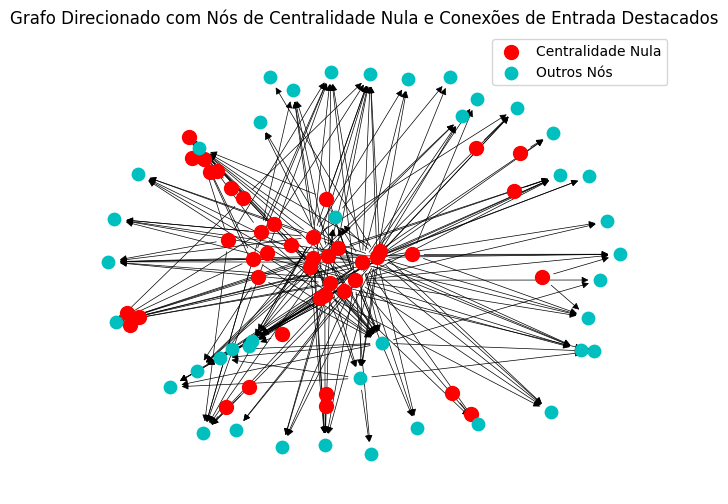

In [62]:
# Desenhar o grafo e destacar os vértices com centralidade nula
desenhar_grafo_com_centralidade_nula(G_fresh)

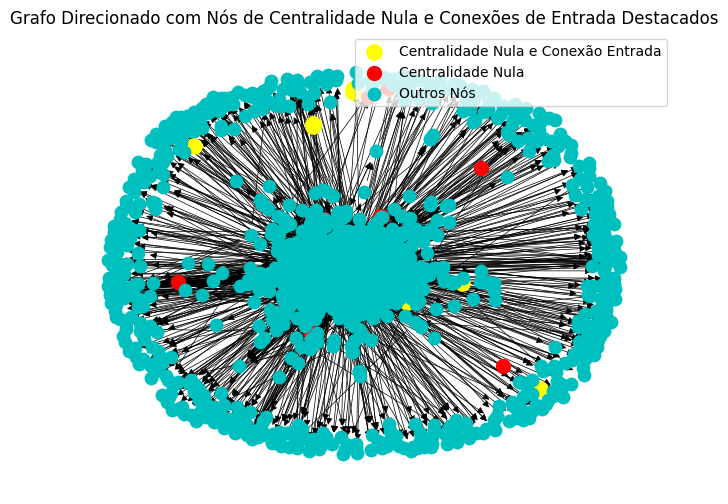

In [63]:
desenhar_grafo_com_centralidade_nula(G_bit)

In [64]:
desenhar_grafo_com_centralidade_nula(G_graders)

Nenhum nó com centralidade nula.


**Exercício 4.** Mostrar o scatter plot de grau (i.e. número de vizinhos) vs. acessibilidade calculada) no nível hierárquico $h=1$.

**Descrição:** Uma rede de colaborações científicas entre instituições na Nova Zelândia. Os nós são instituições (universidades, organizações, etc.), e dois nós $i$, $j$ estão conectados se o Scopus listar pelo menos uma publicação com autores nas instituições $i$ e $j$, no período de 2010-2015. As arestas são ponderadas pelo número dessas colaborações. Os nós são anotados com o tipo categórico da instituição.

Número de nós: 1463
Número de arestas: 4246


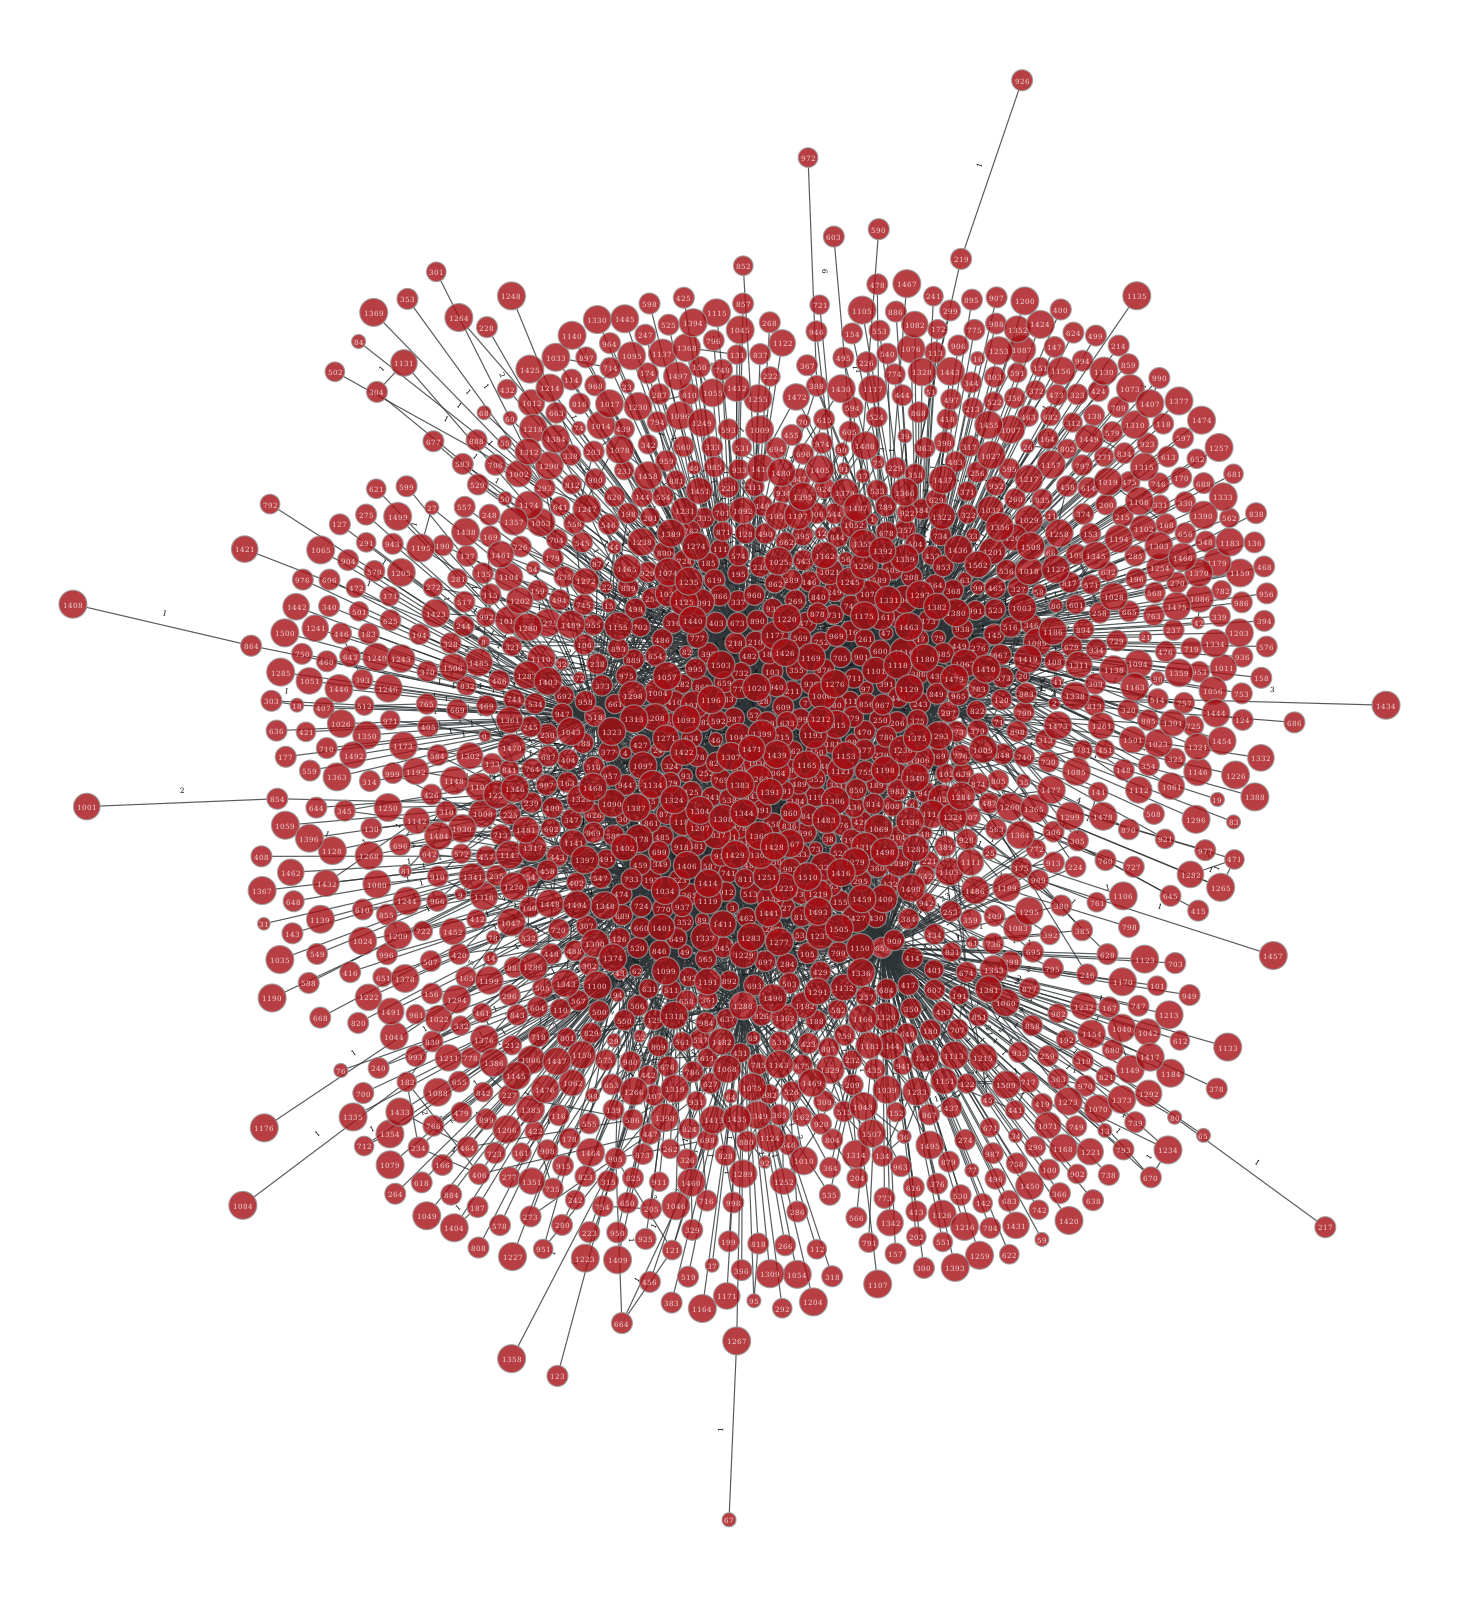

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7c426c144d30, at 0x7c4260a962c0>

In [20]:
# Carregando o grafo da coleção
g = gt.collection.ns["new_zealand_collab"]

# Remover autolaços do grafo Graph-tool
g.set_edge_filter(g.new_edge_property("bool", vals=[0 if e.source() == e.target() else 1 for e in g.edges()]))

# Encontrar a maior componente conectada
largest_component = gt.extract_largest_component(g)

# Converter para NetworkX
G_nx = nx.Graph()

# Adicionar arestas do Graph-tool para NetworkX
for edge in largest_component.edges():
    G_nx.add_edge(edge.source(), edge.target())

# Remover auto-laços em NetworkX
G_nx.remove_edges_from(nx.selfloop_edges(G_nx))

# Imprimir o número de nós e arestas
print("Número de nós:", G_nx.number_of_nodes())
print("Número de arestas:", G_nx.number_of_edges())

# Plotar o grafo filtrado
gt.graph_draw(largest_component, vertex_text=largest_component.vertex_index,
              edge_text=largest_component.edge_properties['weight'],
              output_size=(800, 800))


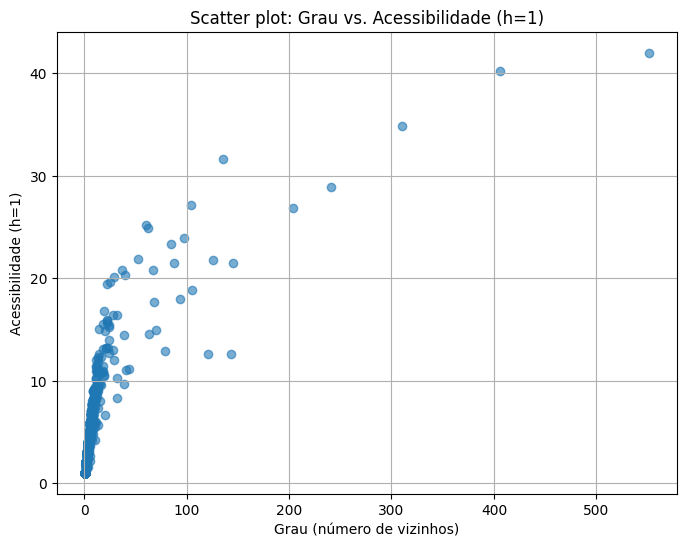

In [21]:
# Carregando o grafo da coleção
g = gt.collection.ns["new_zealand_collab"]

# Remover autolaços do grafo Graph-tool
g.set_edge_filter(g.new_edge_property("bool", vals=[0 if e.source() == e.target() else 1 for e in g.edges()]))

# Encontrar a maior componente conectada
largest_component = gt.extract_largest_component(g)

# Converter para NetworkX
G_nx = nx.Graph()

# Adicionar arestas do Graph-tool para NetworkX, incluindo pesos
edge_weights = largest_component.ep['weight']  # Assume que a propriedade de peso é 'weight'

for edge in largest_component.edges():
    weight = edge_weights[edge]  # Obter o peso da aresta
    G_nx.add_edge(edge.source(), edge.target(), weight=weight)

# Remover auto-laços em NetworkX
G_nx.remove_edges_from(nx.selfloop_edges(G_nx))

# Função para calcular a acessibilidade no nível hierárquico h=1, considerando pesos das arestas
def calculate_accessibility(G_nx):
    accessibility = {}
    for node in G_nx.nodes():
        neighbors = list(G_nx.neighbors(node))
        if len(neighbors) > 0:
            # Usar pesos das arestas para calcular a distribuição de probabilidade
            prob_distribution = np.array([G_nx[node][neighbor]['weight'] for neighbor in neighbors])
            prob_distribution = prob_distribution / prob_distribution.sum()  # Normalização
            # Acessibilidade como exp(-Σ pi * log(pi))
            accessibility[node] = np.exp(-np.sum(prob_distribution * np.log(prob_distribution)))
        else:
            accessibility[node] = 0  # Caso o nó não tenha vizinhos, acessibilidade é zero
    return accessibility

# Calcular a acessibilidade no nível hierárquico h=1
accessibility = calculate_accessibility(G_nx)

# Coletar graus e acessibilidades para o scatter plot
degrees = [G_nx.degree(node) for node in G_nx.nodes()]
accessibilities = [accessibility[node] for node in G_nx.nodes()]

# Criar scatter plot (grau vs. acessibilidade)
plt.figure(figsize=(8, 6))
plt.scatter(degrees, accessibilities, alpha=0.6)
plt.xlabel('Grau (número de vizinhos)')
plt.ylabel('Acessibilidade (h=1)')
plt.title('Scatter plot: Grau vs. Acessibilidade (h=1)')
plt.grid(True)
plt.show()


**Exercício 6.** Calcule a correlação de rank (Spearman correlation coeficiente) obtida entre o grau e a centralidade Katz, para qualquer valor adequado de alpha (i.e. um alpha que garante convergência da medida de centralidade).

**Descrição**  
Uma pequena rede ego do Facebook anonimizada, de abril de 2014. Os nós são perfis do Facebook, e uma aresta existe se os dois perfis são "amigos" no Facebook. Metadados fornecem o contexto social para o relacionamento entre o ego e o alter.

**Citação**
B. F. Maier and D. Brockmann, "Cover time for random walks on arbitrary complex networks." Phys. Rev. E 96, 042307 (2017), https://arxiv.org/abs/1706.02356

Número de nós: 329
Número de arestas: 1954


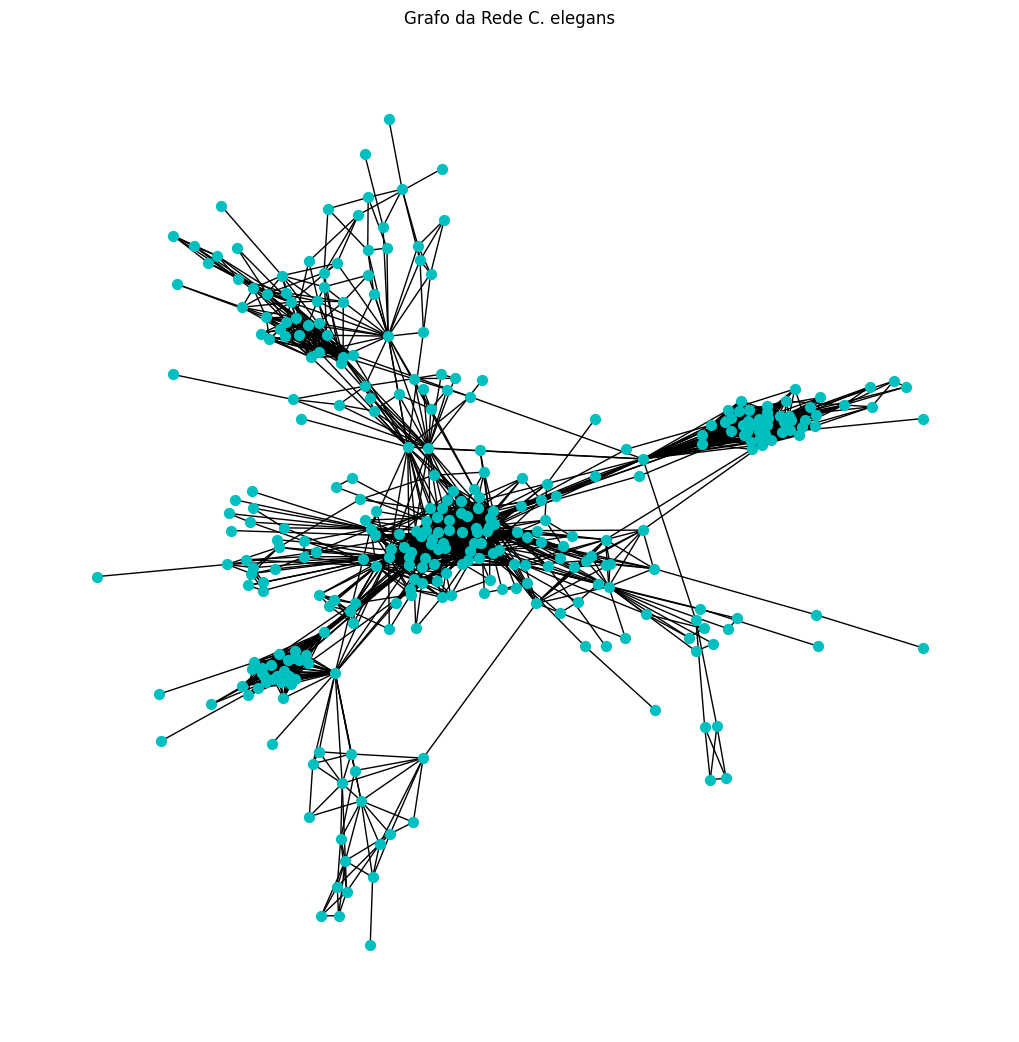

In [22]:
# Carregando a rede
G_gt = gt.collection.ns["facebook_friends"]

# Criando um grafo vazio do NetworkX
G_nx = nx.Graph()

# Adicionando arestas do grafo do Graph-tool para o grafo do NetworkX
for edge in G_gt.edges():
    G_nx.add_edge(edge.source(), edge.target())

# Removendo auto-laços
G_nx.remove_edges_from(nx.selfloop_edges(G_nx))

# Obtendo o maior componente conectado
Gcc = sorted(nx.connected_components(G_nx), key=len, reverse=True)
G_nx = G_nx.subgraph(Gcc[0])

# Convertendo rótulos de nós para inteiros
mapeamento = {node: idx for idx, node in enumerate(G_nx.nodes())}
G_nx = nx.relabel_nodes(G_nx, mapeamento)

N = len(G_nx)
M = G_nx.number_of_edges()
print("Número de nós:", N)
print("Número de arestas:", M)

# Calculando a posição dos nós usando o layout spring do NetworkX
pos = nx.spring_layout(G_nx)

# Desenhando o grafo
plt.figure(figsize=(10, 10))
nx.draw(G_nx, pos, node_color="c", node_size=50, with_labels=False)
plt.title("Grafo da Rede C. elegans")
plt.show()

In [25]:
# 1. Obter o grau de cada nó
degrees = dict(G_nx.degree())

# 2. Calcular a centralidade Katz com um valor adequado de alpha
# Encontrando o maior autovalor da matriz de adjacência para garantir convergência
largest_eigenvalue = max(nx.adjacency_spectrum(G_nx)).real
alpha = 1 / largest_eigenvalue * 0.9  # alpha menor que 1/λ_max

katz_centrality = nx.katz_centrality_numpy(G_nx, alpha=alpha)

# 3. Calcular a correlação de Spearman entre o grau e a centralidade Katz
degree_values = list(degrees.values())
katz_values = list(katz_centrality.values())

correlation, _ = spearmanr(degree_values, katz_values)

print(f'Correlação de Spearman entre grau e centralidade Katz: {correlation}')

Correlação de Spearman entre grau e centralidade Katz: 0.8961891782997485
